In [1]:
import pandas as pd

folder_path ='datasets/'
csv_files = [
    'athlete_events', 
    'cities', 
    'countries',
    'gdp',
    'noc_regions',
    'political_regime',
    'poverty',
    'healthcare_expenditure_gdp',
    'obesity_adults',
    'population_per_country']
csv = '.csv'

In [35]:
df = pd.read_csv(folder_path+'athlete_events'+csv)
print(df.size)
df.head()

4066740


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [36]:
medalists = df.loc[df['Medal']!='NaN']
gold_medalists = medalists.groupby(['Year','Team'])['Medal'].count().reset_index().sort_values(by='Medal', ascending=False)

In [37]:
gold_medalists.head()

,Year,Team,Medal
2312,1980,Soviet Union,488
2501,1984,United States,359
2685,1988,Soviet Union,352
2201,1976,Soviet Union,336
4427,2008,United States,309


In [39]:
gold_medalists = gold_medalists.loc[(gold_medalists['Year']>1990)&(gold_medalists['Medal']>30)]

In [40]:
gold_medalists['Year'] = gold_medalists['Year'].astype('str')

In [41]:
gold_medalists.dtypes

Year     object
Team     object
Medal     int64
dtype: object

In [42]:
gold_medalists = gold_medalists.dropna()

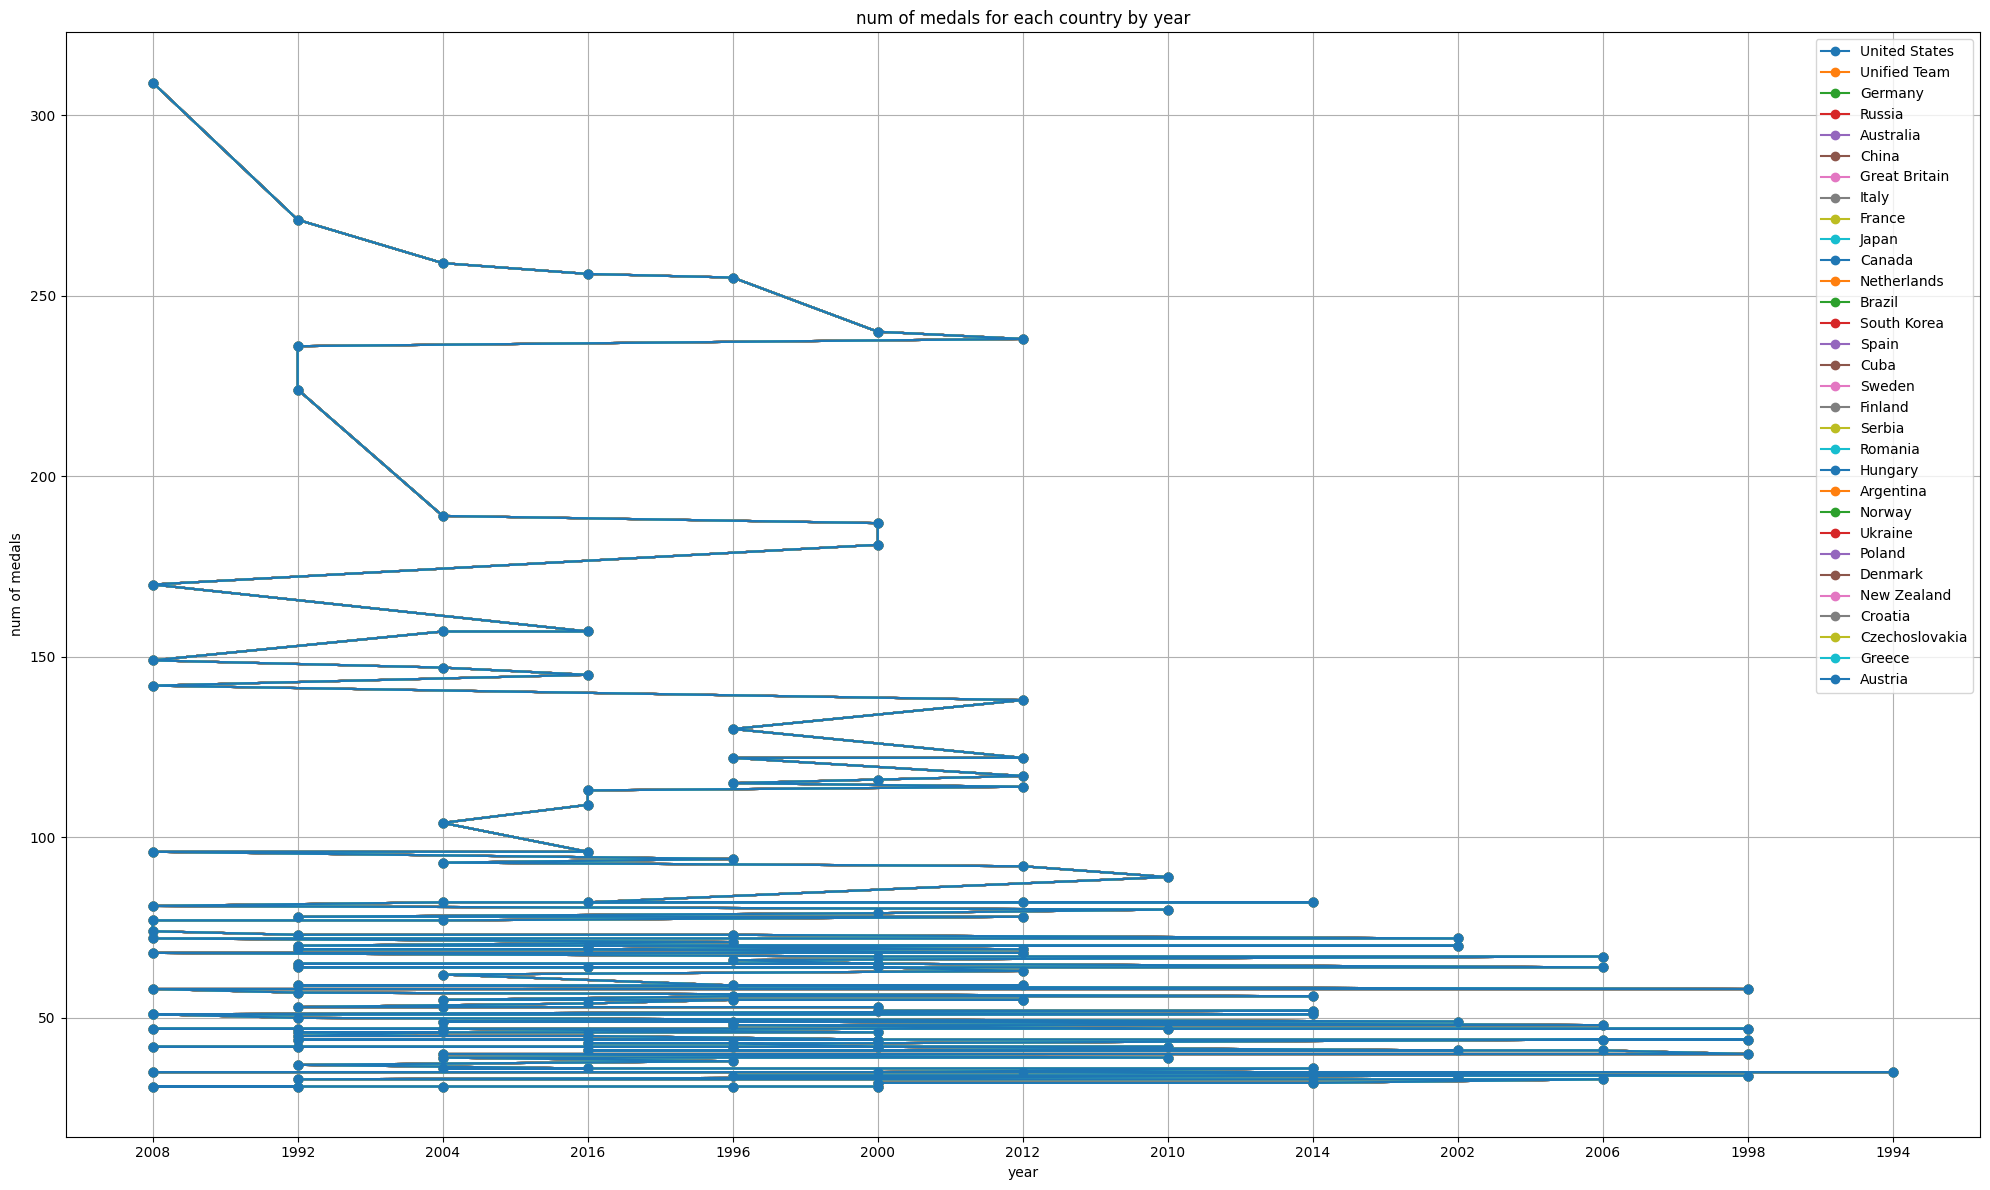

In [47]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,12))

teams = gold_medalists['Team'].unique()
years = gold_medalists['Year'].unique()

for i, team in enumerate(teams):
    team_data = gold_medalists[gold_medalists['Team']==team]
    x_val = [np.where(years == year)[0][0] for year in gold_medalists['Year']]
    plt.plot(x_val, gold_medalists['Medal'], marker='o', label=team)

plt.xticks(range(len(years)),years)

plt.xlabel('year')
plt.ylabel('num of medals')
plt.title('num of medals for each country by year')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()